For Iris dataset your task is to print steps for every split in the decision tree.
Your Project is divided in 2 parts -

1. Print the Decision tree steps as specified in the example below. This is of 80 marks in total.

2. Decision Tree Implementation:  Building actual decision tree for the dataset and then printing it. This is of 20 marks.

Dataset: Iris dataset.

Implementation: Consider the decision tree for OR below: <img src="PROJECT IMAGE.PNG">

Expected Output:

Level  0
Count of  0(False)  =  1
Count of  1(True)  =  3
Current Entropy  is =  0.811278124459
Splitting on feature  X1  with gain ratio  0.311278124459

Level  1
Count of  0  =  1
Count of  1  =  1
Current Entropy is =  1.0
Splitting on feature  X2  with gain ratio  1.0

Level  2
Count of  0  =  1
Current Entropy  is =  0.0
Reached leaf Node

Level  2
Count of  1  =  1
Current Entropy  is =  0.0
Reached leaf Node

Level  1
Count of  1  =  2
Current Entropy  is =  0.0
Reached leaf Node



### IMPORTING NECESSARY LIBRARIES AND CONVERTING THE DATASET INTO WORKABLE DATAFRAME 

In [1]:
import pandas as pd
from sklearn import datasets
import math  

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
df = pd.DataFrame(iris.data)
df.columns = ['sl', 'sw', 'pl', 'pw']
df.head()

,sl,sw,pl,pw
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### FUNCTION TO LABEL THE VALUES 

In [4]:
# if MIN_Value <=val < (m + Mean_Value) / 2 then it is assigned label a
# if (m + Mean_Value) <=val < Mean_Value then it is assigned label b
# if (Mean_Value) <=val < (Mean_Value + MAX_Value)/2 then it is assigned label c
# if (Mean_Value + MAX_Value)/2 <=val <= MAX_Value  then it is assigned label d

def label(val, *boundaries):
    if val < boundaries[0]:
        return 'a'
    elif val < boundaries[1]:
        return 'b'
    elif val < boundaries[2]:
        return 'c'
    else:
        return 'd'
    


In [5]:
# Function to convert continuous data into labelled data
# There are 4 labels a, b, c , d

def to_label(df, old_feature_name):
    second = df[old_feature_name].mean()
    minimum = df[old_feature_name].min()
    first = (minimum + second) / 2
    maximum = df[old_feature_name].max()
    third = (maximum + second) / 2
    return df[old_feature_name].apply(label, args = (first, second, third))

In [6]:
# Convert all columns to labelled data

df['sl_labelled'] = to_label(df, 'sl')
df['sw_labelled'] = to_label(df, 'sw')
df['pl_labelled'] = to_label(df, 'pl')
df['pw_labelled'] = to_label(df, 'pw')
df

,sl,sw,pl,pw,sl_labelled,sw_labelled,pl_labelled,pw_labelled
0,5.1,3.5,1.4,0.2,b,c,a,a
1,4.9,3.0,1.4,0.2,a,b,a,a
2,4.7,3.2,1.3,0.2,a,c,a,a
3,4.6,3.1,1.5,0.2,a,c,a,a
4,5.0,3.6,1.4,0.2,a,c,a,a
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,c,b,c,d
146,6.3,2.5,5.0,1.9,c,a,c,d
147,6.5,3.0,5.2,2.0,c,b,c,d
148,6.2,3.4,5.4,2.3,c,c,d,d


In [7]:
df.drop(['pl', 'pw', 'sl', 'sw'], axis = 1, inplace = True)

In [8]:
df.head()

,sl_labelled,sw_labelled,pl_labelled,pw_labelled
0,b,c,a,a
1,a,b,a,a
2,a,c,a,a
3,a,c,a,a
4,a,c,a,a


### FUNCTION TO CALCULATE INFORMATION GAIN

In [9]:
def information_gain(x, y, feat):
    
    # calculating entropy of Y 
    initial_entropy = curr_entropy(y)  
    
    # to get the count of number of labels present in Y data
    target_length = len(y)   
    
    # initiating weighted average = 0 
    weighted_entropy = 0  
    
    # unique labels
    val = set(x[feat]) 
    
    # iterating to get weighted entropies of each child and add them 
    for i in val :
        child = y[(x[feat] == i)]
        i_entropy = curr_entropy(child)
        
        weighted_entropy += (i_entropy * len(child)) / target_length
        
    #finding info gain
    info_gain = initial_entropy - weighted_entropy  
    
    # returning information gain
    return info_gain

### FUNCTION TO CALCULATE ENTROPY OF A PARTICULAR NODE 

In [10]:
def curr_entropy(y) :
    target_length = len(y)  # length of target
    entropy_value = 0   # taking entropy value to be 0 initially
    
    for i in set(y[0]) :  # iterating over each label present in Y
        class_count = len(y[y[0] == i])  # counting occurence of classes in Y  
        prob = class_count/target_length     # calculating probability
        entropy_value += prob * math.log(prob, 2)  # adding it to total entropy  
        
    entropy_value = -entropy_value
    
    return entropy_value # returning the value

### FUNCTION RETURNING SPLIT INFORMATION TO CALCULATE GAIN RATIO

In [11]:
def split_info(x, y, feature) :
    target_length = len(y)
    split = 0
    
    # unique values in each feature
    val = set(x[feature]) 
    
    for i in val : # iterating over the feature
        
        # taking values of Y where feature is i (given iteration)
        child = y[x[feature] == i] 
        
        # calculating weighted average         
        split += (len(child) / target_length) * math.log((len(child) / target_length), 2) 
        
    return -1 * split # returning the split info value

### FUNCTION TO CALCULATE AND RETURN THE BEST FEATURE TO SPLIT UPON

In [12]:
def get_feature(x, y, features) :
    # initially setting best feature as ampty string ''
    best_feature = ''  
    # initially max_gain = -1
    max_gain = -1      
    
    # iterating over all features
    for i in features :
        # finding split info and info_gain by calling these functions
        split = split_info(x, y, i) 
        info_gain = information_gain(x, y, i)
        
        # calculating gain ratio
        if split != 0 :
            gain_ratio = info_gain / split   
        else :
            gain_ratio = -1
        
        # getting the best feature and the best gain ratio
        if max_gain < gain_ratio :
            best_feature = i
            max_gain = gain_ratio
            
    return best_feature , max_gain # returning the values 

### FUNCTION TO PRINT THE DECISION TREE

In [13]:
def print_DT(X, Y, features, level):
    # unique labels in Y
    classes = set(Y[0])   
    
    #------------ BASE CASE 1 ------------#
    
    # all values belong to same class
    if len(classes) == 1:       
        # reached a leaf or a pure node and not splitting any further (only one feature left)
        print("Level ", level)  
        
        class_name = list(classes)[0]
        
        print("Count of", class_name, "=", len(Y))  # Printing count of class at leaf node
        print("Current Entropy is = 0.0") # Entropy is 0 since this a leaf/pure node 
        print("Reached Leaf Node")  # Acknowledging leaf node
        print("Class Name =", class_name)
        print()
        
        return 
        
        
    #------------ BASE CASE 1 ------------#
    
    # if no features are left to split upon
    elif len(features) == 0:    
        
        print("Level", level)   # level of node
        
        for i in classes:
            # counting numbers of the output classes
            count = (Y[0]==i).sum() 
            
            # printing the count of each class present in that leaf node
            print("Count of", i, "=", count)  
        
        # calling entropy function for that leaf node
        entropy = curr_entropy(Y)     
        
        print("Current Entropy is =", entropy)
        print("Reached Leaf Node")
        
        class_name = list(classes)[0]
        print("Class Name = ", class_name)
        print()
        
        return 
    
    # checking if best_feature is -1
    elif (get_feature(X, Y, features))[0] == '':   
        print("Level", level)
        for i in classes:
            j = (Y[0]==i).sum()
            print("Count of ", i, "= ", j)
            
        entropy = curr_entropy(Y) # calculating entropy 
        
        print("Current Entropy is =", entropy)
        print("Zero features left")
        print("Reached leaf Node")
        print("Output Class Name =", class_name)
        print()
        return
    
    # other cases of nodes in the decision tree
    else: 
        # current level of tree
        print("Level", level)    
        max_count = 0
        class_name = ''
        
        for i in classes:
            j = (Y[0]==i).sum()
            print("Count of", i, "= ", j)
            
            if j >= max_count:
                max_count = j
                class_name  = i
                
        # calling entropy function
        entropy = curr_entropy(Y)
        print("Current Entropy is = ", entropy)
        
        # calling get_feature function to get the feature that gives max gain
        best_feature, gain_ratio = get_feature(X, Y, features) 
        print("Splitting on feature", best_feature, "with gain ratio ", gain_ratio)
        
        print("Class Name = ", class_name)
        print()
        
        # different values of best feature in the given data
        vals = set(X[best_feature]) 
        
        # iterating over feature values
        for i in vals:
            a = X[(X[best_feature] == i)]
            b = Y[(X[best_feature] == i)]
            
            # removing the chosen feature for further splitting
            remainders = features - {best_feature}   
            
            # recursive calling the function so that all levels are covered 
            print_DT(a, b, remainders, level+1)        
            
        return 

### DEFINING THE NECESSARY VARIABLES AND VALUES AND THEN CALLING print_DT FUNCTION TO PRINT THE TREE

In [14]:
y = pd.DataFrame(iris.target)
y[y[0] == 0] = 'setosa'
y[y[0] == 1] = 'versicolor'
y[y[0] == 2] = 'virginica'

features = set(df.columns) # all unique features 

# calling the print_DT function to print the Decision tree
print_DT(df, y, features, 0)

Level 0
Count of setosa =  50
Count of virginica =  50
Count of versicolor =  50
Current Entropy is =  1.584962500721156
Splitting on feature pw_labelled with gain ratio  0.699638203622209
Class Name =  versicolor

Level  1
Count of setosa = 50
Current Entropy is = 0.0
Reached Leaf Node
Class Name = setosa

Level 1
Count of virginica =  16
Count of versicolor =  40
Current Entropy is =  0.863120568566631
Splitting on feature pl_labelled with gain ratio  0.4334099495621066
Class Name =  versicolor

Level 2
Count of virginica =  8
Count of versicolor =  39
Current Entropy is =  0.6581912658132185
Splitting on feature sl_labelled with gain ratio  0.12674503775809332
Class Name =  versicolor

Level  3
Count of virginica = 1
Current Entropy is = 0.0
Reached Leaf Node
Class Name = virginica

Level 3
Count of virginica =  7
Count of versicolor =  23
Current Entropy is =  0.783776947484701
Splitting on feature sw_labelled with gain ratio  0.07092036405148876
Class Name =  versicolor

Level 4
C

In [18]:
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image

In [19]:
x = iris.data
y = iris.target
clf = DecisionTreeClassifier(criterion = "entropy")
clf.fit(x, y)

DecisionTreeClassifier(criterion='entropy')

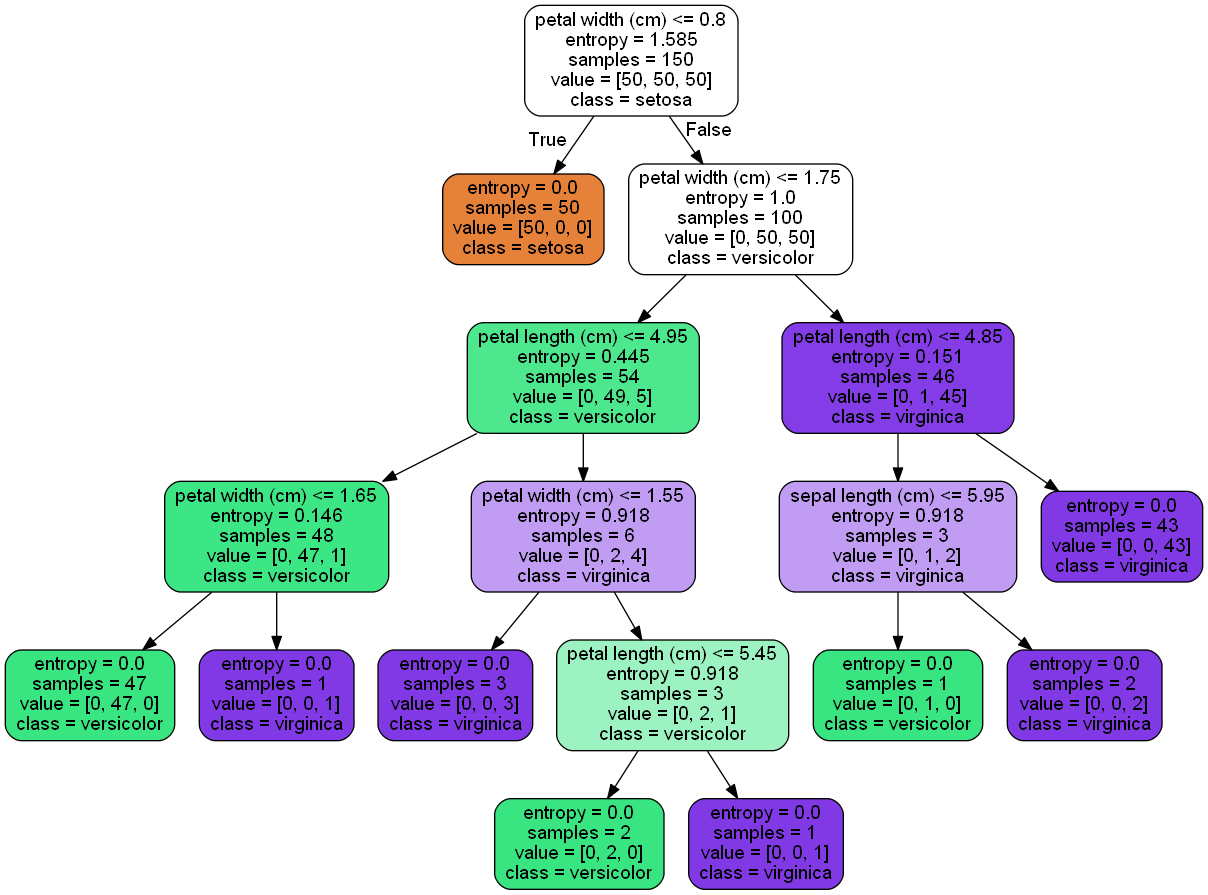

In [20]:
dot_data = StringIO() 
export_graphviz(clf, out_file = dot_data, filled=True, rounded=True,
                feature_names=iris.feature_names,class_names=iris.target_names) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())